# Introduction
Thanks for looking.  
This competition will predict the outcome of future soccer matches based on historical data!  
In this notebook, we will show a simple implementation of the lightgbm method for beginners in machine learning.

# Module Load
First, import required modules.

In [1]:
import numpy as np
import pandas as pd
import warnings
import time
warnings.simplefilter('ignore')
import math
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

# Loading Data
Loading data by using read_csv in pandas.


In [2]:
train_df = pd.read_csv('C:/Users/HP/Downloads/football-match-probability-prediction/train.csv')
test_df = pd.read_csv('C:/Users/HP/Downloads/football-match-probability-prediction/test.csv')
train_target_score_df = pd.read_csv('C:/Users/HP/Downloads/football-match-probability-prediction/train_target_and_scores.csv')

## Explanatory Data Analysis

Check the contents and shape

In [3]:
print(train_df.shape)
train_df.head()

(110938, 190)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [4]:
print(train_target_score_df.shape)
train_target_score_df.head()

(110938, 3)


,id,score,target
0,11906497,2-3,away
1,11984383,1-0,home
2,11983301,2-2,draw
3,11983471,1-2,away
4,11883005,1-0,home


In [5]:
print(test_df.shape)
test_df.head()

(72711, 189)


,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0


### Data Summary
***
**train.csv**...the training set. It contains data from 110938 matches from December 1, 2019 to May 1, 2021.  
**test.csv**...the test set. No away and home team names.  
**train_target_and_scores.csv** - contains each match's final score Home - Away in addition to the target which is also in the training set.

*  target - The team that won that match
*  home_team_name - The name of the Home the team. Hidden in test set, see this discussion
*  away_team_name - The name of the Away the team. Hidden in test set, see this discussion
*  match_date - The match date (UTC).
*  league_name - The league name.
*  league_id - The league id. Note that league names can be identical for two differents id.
*  is_cup - If the value is 1 the match is played for a cup compettion.
*  home_team_coach_id - The id of the Home team coach.
*  away_team_coach_id - The id of the Away team coach.
*  home_team_history_match_date_{i} - The date of the last i-th match played by Home team.
*  home_team_history_is_play_home_{i} - If 1, the Home team played home.
*  home_team_history_is_cup_{i} - If 1, the match was a cup competition.
*  home_team_history_goal_{i} - The number of goals scored by the Home team on its last i-th match.
*  home_team_history_opponent_goal_{i} - The number of goals conceded by the Home team on its last i-th match.
*  home_team_history_rating_{i} - The rating of the Home team on its last i-th match (pre match rating).
*  home_team_history_opponent_rating_{i} - The rating of the opponent team on Home team last i-th match (pre match rating).
*  home_team_history_coach_{i} - The coach id of the Home team on its last i-th match.
*  home_team_history_league_id_{i} - The league name id by the Home team on its last i-th match.
*  away_team_history_match_date_{i} - The date of the last i-th match played by Away team.
*  away_team_history_is_play_home_{i} - If 1, the Away team played home.
*  away_team_history_is_cup_{i} - If 1, the match was a cup competition.
*  away_team_history_goal_{i} - The number of goals scored by the Away team on its last i-th match.
*  away_team_history_opponent_goal_{i} - The number of goals conceded by the Away team on its last i-th match.
*  away_team_history_rating_{i} - The rating of the Away team on its last i-th match (pre match rating).
*  away_team_history_opponent_rating_{i} - The rating of the opponent team on Away team last i-th match (pre match rating).
*  away_team_history_coach_{i} - The coach id of the Away team on its last i-th match.
*  away_team_history_league_id_{i} - The league name id played by the Away on its last i-th match.

Specify id as line name

In [6]:
train_df.set_index(keys='id', inplace=True)
test_df.set_index(keys='id', inplace=True) 
train_df.head() 

,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


For `train_target_score_df`, do the same with the line name as id and label encoding for `'target'`

In [7]:
train_target_score_df.set_index(keys='id', inplace=True)
train_target_score_df = train_target_score_df['target'].map({'home': 0, 'draw': 1, 'away': 2})
train_target_score_df.head()

id
11906497    2
11984383    0
11983301    1
11983471    2
11883005    0
Name: target, dtype: int64

Here, visualize the relationship between target and other features using *`seaborn`*  
*  Target and league_id do not correlate
*  Targets and rating are slightly correlate
  .
  .

['home_team_history_goal_1', 'home_team_history_goal_2', 'home_team_history_goal_3', 'home_team_history_goal_4', 'home_team_history_goal_5', 'home_team_history_goal_6', 'home_team_history_goal_7', 'home_team_history_goal_8', 'home_team_history_goal_9', 'home_team_history_goal_10']


<AxesSubplot:>

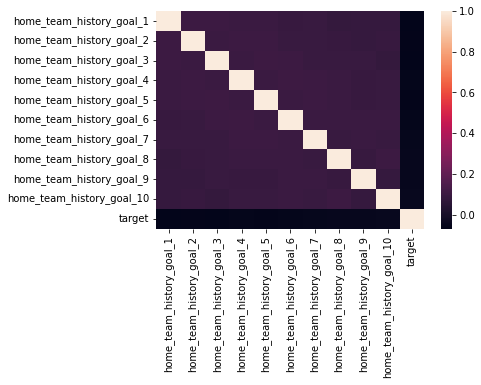

In [9]:
### Please change to the column that interests you. (ex)'home_team_history_rating' 
target_columns = 'home_team_history_goal'
###
cols = []
for col in train_df.filter(regex=target_columns, axis=1).columns:
    cols.append(col)
print(cols)
corr = pd.concat([train_df[cols],train_target_score_df], axis=1).corr()
sns.heatmap(corr)

## Features
Next, finding and observing the features

First, except for the correct labels in `train_df`, combine with `test_df` for simultaneous processing

In [9]:
# Only correct labels should be separated.
train_df_y = train_df['target']
train_df.drop(['target'], axis=1, inplace=True) 
train_df.head()

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,2019-11-23 03:10:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,2019-11-24 01:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [10]:
# Combine train_df and test_df
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df))
print(all_data.shape)
all_data.head()

(183649, 188)


,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,2019-11-23 03:10:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,2019-11-24 01:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


Remove date, team_name and coach as they are not used.

In [11]:
all_data.drop(['home_team_name', 'away_team_name', 'league_name'], axis=1, inplace=True)
all_data.drop(all_data.filter(regex='date').columns, axis=1, inplace = True)
all_data.drop(all_data.filter(regex='coach').columns, axis=1, inplace = True)
all_data.head()

,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,636,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,752,False,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,734,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,743,False,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,705,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


Convert is_cup to numeric information since is_cup is character information.

In [12]:
all_data['is_cup'] = all_data['is_cup'].map({False: 0, True: 1})
all_data.head()

,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,636,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,752,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,734,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,743,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,705,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


Check missing information

In [13]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head(30)

30


,Missing Ratio
away_team_history_is_cup_10,11.564452
away_team_history_opponent_rating_10,11.184923
away_team_history_rating_10,11.184923
away_team_history_league_id_10,11.175667
away_team_history_opponent_goal_10,11.175667
away_team_history_goal_10,11.175667
away_team_history_is_play_home_10,11.175667
home_team_history_is_cup_10,11.082010
home_team_history_opponent_rating_10,10.697581
home_team_history_rating_10,10.697581


The missing information is as follows.
*  ~ is_cup ~ ... fill with zero.
*  ~ rating ~ ... fill with mean value.
*  ~ is_play_home ~ ... fill with 0.5.
*  ~ goal ~ ... fill with mean value.

In [14]:
# is_cup
for col in all_data.filter(regex='is_cup', axis=1).columns:
    all_data[col] = all_data[col].fillna(0)
# rating
for col in all_data.filter(regex='rating', axis=1).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mean())
# is play home
for col in all_data.filter(regex='is_play_home', axis=1).columns: 
    all_data[col] = all_data[col].fillna(0.5)
# league
for col in all_data.filter(regex='league', axis=1).columns:  
    all_data[col] = all_data[col].fillna(0)
# goal
for col in all_data.filter(regex='goal', axis=1).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mean())

Reconfirm missing values

In [15]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(len(all_data_na))
missing_data.head()

0


,Missing Ratio


Undo `test_df` and `train_df`

In [16]:
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]
print(train_df.shape, test_df.shape)
train_df.head()

(110938, 142) (72711, 142)


,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,636,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,752,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,734,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,743,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,705,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


# Trainig
Now that feature engineering is done, create and train the model

## Model Partitioning
Split `train_df` into **training data** (used to train the model) and **test data** (used to verify generalization performance of the model)

In [17]:
# pandas -> numpy
X = train_df.values
y = train_target_score_df.values
print(X.shape, y.shape)
# split training data and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(110938, 142) (110938,)
(88750, 142) (22188, 142)
(88750,) (22188,)


## Hyperparameter tuning
Furthermore, the training data is split into training data and validation data, and hyperparameter tuning is performed using the validation data.  
This process is time consuming, so skip this cell when implementing without tuning.

In [23]:
import optuna.integration.lightgbm as lgb   #Models with tuning

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.30, random_state=1998, stratify=y_train)
# Create dataset for LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid)
# setting parameter
params = {'objective': 'multiclass', 
          'num_class': 3,
          'metric': 'multi_logloss', 
          'verbosity': -1, 
          'num_leaves': 45, 
          'learning_rate': 0.05, 
          'feature_fraction': 1.0, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 2, 
          'feature_pre_filter': False, 
          'lambda_l1': 0.005, 
          'lambda_l2': 1.0e-08, 
          'min_child_samples': 25}
 #Model creation from training data
gbm = lgb.train(params, lgb_train, valid_sets=lgb_valid,
                verbose_eval=50, # Learning result output every 50 iter
                num_boost_round=10000, # max iteration
                early_stopping_rounds=100
              )
best_params = gbm.params
print(best_params)
# Check forecast accuracy
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print(y_pred)

[I 2022-06-02 15:44:51,124] A new study created in memory with name: no-name-8939ccf9-1b33-4727-9595-6396bf89ccea
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01834
[100]	valid_0's multi_logloss: 1.01352
[150]	valid_0's multi_logloss: 1.01315
[200]	valid_0's multi_logloss: 1.01333


feature_fraction, val_score: 1.012966:  14%|######4                                      | 1/7 [00:16<01:40, 16.72s/it]

Early stopping, best iteration is:
[132]	valid_0's multi_logloss: 1.01297
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01831
[100]	valid_0's multi_logloss: 1.01366
[150]	valid_0's multi_logloss: 1.01332
[200]	valid_0's multi_logloss: 1.01434


feature_fraction, val_score: 1.012839:  29%|############8                                | 2/7 [00:35<01:29, 17.90s/it]

Early stopping, best iteration is:
[124]	valid_0's multi_logloss: 1.01284
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01872
[100]	valid_0's multi_logloss: 1.01413
[150]	valid_0's multi_logloss: 1.01373
[200]	valid_0's multi_logloss: 1.01476


feature_fraction, val_score: 1.012839:  43%|###################2                         | 3/7 [00:56<01:17, 19.27s/it]

Early stopping, best iteration is:
[140]	valid_0's multi_logloss: 1.01368
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.0189
[100]	valid_0's multi_logloss: 1.01381
[150]	valid_0's multi_logloss: 1.01303
[200]	valid_0's multi_logloss: 1.01347


feature_fraction, val_score: 1.012839:  57%|#########################7                   | 4/7 [01:26<01:10, 23.43s/it]

Early stopping, best iteration is:
[149]	valid_0's multi_logloss: 1.01301
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01919
[100]	valid_0's multi_logloss: 1.01375
[150]	valid_0's multi_logloss: 1.01266
[200]	valid_0's multi_logloss: 1.0125
[250]	valid_0's multi_logloss: 1.0129
Early stopping, best iteration is:
[189]	valid_0's multi_logloss: 1.01225


feature_fraction, val_score: 1.012247:  71%|################################1            | 5/7 [01:57<00:52, 26.17s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01877
[100]	valid_0's multi_logloss: 1.01388
[150]	valid_0's multi_logloss: 1.01322
[200]	valid_0's multi_logloss: 1.01373


feature_fraction, val_score: 1.012247:  86%|######################################5      | 6/7 [02:16<00:23, 23.75s/it]

Early stopping, best iteration is:
[133]	valid_0's multi_logloss: 1.01315
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01888
[100]	valid_0's multi_logloss: 1.0134
[150]	valid_0's multi_logloss: 1.01289
[200]	valid_0's multi_logloss: 1.01324
[250]	valid_0's multi_logloss: 1.01281


feature_fraction, val_score: 1.012247: 100%|#############################################| 7/7 [02:40<00:00, 22.95s/it]


Early stopping, best iteration is:
[162]	valid_0's multi_logloss: 1.01277


num_leaves, val_score: 1.012247:   0%|                                                          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.0174
[100]	valid_0's multi_logloss: 1.01498
[150]	valid_0's multi_logloss: 1.01651
Early stopping, best iteration is:
[93]	valid_0's multi_logloss: 1.01477


num_leaves, val_score: 1.012247:   5%|##5                                               | 1/20 [00:27<08:37, 27.24s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01755
[100]	valid_0's multi_logloss: 1.01446
[150]	valid_0's multi_logloss: 1.01465


num_leaves, val_score: 1.012247:  10%|#####                                             | 2/20 [00:54<08:12, 27.37s/it]

Early stopping, best iteration is:
[90]	valid_0's multi_logloss: 1.01428
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01781
[100]	valid_0's multi_logloss: 1.0138
[150]	valid_0's multi_logloss: 1.01456
[200]	valid_0's multi_logloss: 1.01509


num_leaves, val_score: 1.012247:  15%|#######5                                          | 3/20 [01:19<07:22, 26.01s/it]

Early stopping, best iteration is:
[111]	valid_0's multi_logloss: 1.01361
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01783
[100]	valid_0's multi_logloss: 1.01646
[150]	valid_0's multi_logloss: 1.01892
Early stopping, best iteration is:
[76]	valid_0's multi_logloss: 1.01585


num_leaves, val_score: 1.012247:  20%|##########                                        | 4/20 [01:48<07:17, 27.32s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01715
[100]	valid_0's multi_logloss: 1.01412
[150]	valid_0's multi_logloss: 1.01519


num_leaves, val_score: 1.012247:  20%|##########                                        | 4/20 [02:21<07:17, 27.32s/it]

Early stopping, best iteration is:
[98]	valid_0's multi_logloss: 1.014


num_leaves, val_score: 1.012247:  25%|############5                                     | 5/20 [02:21<07:18, 29.22s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01784
[100]	valid_0's multi_logloss: 1.01716
[150]	valid_0's multi_logloss: 1.01907
Early stopping, best iteration is:
[83]	valid_0's multi_logloss: 1.0167


num_leaves, val_score: 1.012247:  30%|###############                                   | 6/20 [02:58<07:29, 32.11s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.04059
[100]	valid_0's multi_logloss: 1.02913
[150]	valid_0's multi_logloss: 1.02351
[200]	valid_0's multi_logloss: 1.02021
[250]	valid_0's multi_logloss: 1.0179
[300]	valid_0's multi_logloss: 1.01649
[350]	valid_0's multi_logloss: 1.01554
[400]	valid_0's multi_logloss: 1.01477
[450]	valid_0's multi_logloss: 1.01413
[500]	valid_0's multi_logloss: 1.0138
[550]	valid_0's multi_logloss: 1.0135
[600]	valid_0's multi_logloss: 1.01325
[650]	valid_0's multi_logloss: 1.01314
[700]	valid_0's multi_logloss: 1.01302
[750]	valid_0's multi_logloss: 1.01289
[800]	valid_0's multi_logloss: 1.0128
[850]	valid_0's multi_logloss: 1.01286
[900]	valid_0's multi_logloss: 1.01274
[950]	valid_0's multi_logloss: 1.01268
[1000]	valid_0's multi_logloss: 1.01264
[1050]	valid_0's multi_logloss: 1.01258
[1100]	valid_0's multi_logloss: 1.01256
[1150]	valid_0's multi_logloss: 1.01265
Early stopping, best iteration is:
[1058]	

num_leaves, val_score: 1.012247:  35%|#################5                                | 7/20 [04:20<10:29, 48.40s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02159
[100]	valid_0's multi_logloss: 1.01435
[150]	valid_0's multi_logloss: 1.0125
[200]	valid_0's multi_logloss: 1.0121
[250]	valid_0's multi_logloss: 1.01232


num_leaves, val_score: 1.012051:  40%|####################                              | 8/20 [04:45<08:11, 40.96s/it]

Early stopping, best iteration is:
[197]	valid_0's multi_logloss: 1.01205
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01742
[100]	valid_0's multi_logloss: 1.01344
[150]	valid_0's multi_logloss: 1.01371
[200]	valid_0's multi_logloss: 1.01504
Early stopping, best iteration is:
[102]	valid_0's multi_logloss: 1.01334


num_leaves, val_score: 1.012051:  45%|######################5                           | 9/20 [05:08<06:27, 35.23s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.03323
[100]	valid_0's multi_logloss: 1.02259
[150]	valid_0's multi_logloss: 1.01808
[200]	valid_0's multi_logloss: 1.01559
[250]	valid_0's multi_logloss: 1.01418
[300]	valid_0's multi_logloss: 1.01341
[350]	valid_0's multi_logloss: 1.01294
[400]	valid_0's multi_logloss: 1.01247
[450]	valid_0's multi_logloss: 1.01209
[500]	valid_0's multi_logloss: 1.01216
[550]	valid_0's multi_logloss: 1.01195
[600]	valid_0's multi_logloss: 1.01189
[650]	valid_0's multi_logloss: 1.01191


num_leaves, val_score: 1.011849:  50%|########################5                        | 10/20 [05:27<05:02, 30.20s/it]

Early stopping, best iteration is:
[592]	valid_0's multi_logloss: 1.01185
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01963
[100]	valid_0's multi_logloss: 1.01373
[150]	valid_0's multi_logloss: 1.01247
[200]	valid_0's multi_logloss: 1.01255


num_leaves, val_score: 1.011849:  55%|##########################9                      | 11/20 [05:51<04:16, 28.47s/it]

Early stopping, best iteration is:
[149]	valid_0's multi_logloss: 1.0124
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.03605
[100]	valid_0's multi_logloss: 1.02493
[150]	valid_0's multi_logloss: 1.02001
[200]	valid_0's multi_logloss: 1.01711
[250]	valid_0's multi_logloss: 1.01536
[300]	valid_0's multi_logloss: 1.01432
[350]	valid_0's multi_logloss: 1.01371
[400]	valid_0's multi_logloss: 1.01303
[450]	valid_0's multi_logloss: 1.01254
[500]	valid_0's multi_logloss: 1.01242
[550]	valid_0's multi_logloss: 1.01223
[600]	valid_0's multi_logloss: 1.01219
[650]	valid_0's multi_logloss: 1.01224


num_leaves, val_score: 1.011849:  60%|#############################4                   | 12/20 [06:39<04:34, 34.28s/it]

Early stopping, best iteration is:
[589]	valid_0's multi_logloss: 1.01215
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01902
[100]	valid_0's multi_logloss: 1.01334
[150]	valid_0's multi_logloss: 1.01237
[200]	valid_0's multi_logloss: 1.01259
[250]	valid_0's multi_logloss: 1.01278


num_leaves, val_score: 1.011849:  60%|#############################4                   | 12/20 [07:08<04:34, 34.28s/it]

Early stopping, best iteration is:
[162]	valid_0's multi_logloss: 1.01226


num_leaves, val_score: 1.011849:  65%|###############################8                 | 13/20 [07:08<03:50, 32.86s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01943
[100]	valid_0's multi_logloss: 1.01356
[150]	valid_0's multi_logloss: 1.01255
[200]	valid_0's multi_logloss: 1.01273
[250]	valid_0's multi_logloss: 1.01302


num_leaves, val_score: 1.011849:  70%|##################################3              | 14/20 [07:35<03:05, 30.83s/it]

Early stopping, best iteration is:
[158]	valid_0's multi_logloss: 1.01243
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01753
[100]	valid_0's multi_logloss: 1.0153
[150]	valid_0's multi_logloss: 1.01702
Early stopping, best iteration is:
[88]	valid_0's multi_logloss: 1.01499


num_leaves, val_score: 1.011849:  75%|####################################7            | 15/20 [08:06<02:34, 30.91s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02053
[100]	valid_0's multi_logloss: 1.01413
[150]	valid_0's multi_logloss: 1.01264
[200]	valid_0's multi_logloss: 1.01248
[250]	valid_0's multi_logloss: 1.01266


num_leaves, val_score: 1.011849:  80%|#######################################2         | 16/20 [08:30<01:55, 28.84s/it]

Early stopping, best iteration is:
[176]	valid_0's multi_logloss: 1.01231
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01789
[100]	valid_0's multi_logloss: 1.01392
[150]	valid_0's multi_logloss: 1.01378
[200]	valid_0's multi_logloss: 1.01496
Early stopping, best iteration is:
[129]	valid_0's multi_logloss: 1.01351


num_leaves, val_score: 1.011849:  85%|#########################################6       | 17/20 [08:57<01:24, 28.23s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02497
[100]	valid_0's multi_logloss: 1.01631
[150]	valid_0's multi_logloss: 1.01333
[200]	valid_0's multi_logloss: 1.01234
[250]	valid_0's multi_logloss: 1.01192
[300]	valid_0's multi_logloss: 1.01184
[350]	valid_0's multi_logloss: 1.01174
[400]	valid_0's multi_logloss: 1.01188


num_leaves, val_score: 1.011694:  90%|############################################1    | 18/20 [09:30<00:59, 29.83s/it]

Early stopping, best iteration is:
[320]	valid_0's multi_logloss: 1.01169
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01829
[100]	valid_0's multi_logloss: 1.01778
[150]	valid_0's multi_logloss: 1.02097
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 1.01709


num_leaves, val_score: 1.011694:  95%|##############################################5  | 19/20 [10:05<00:31, 31.29s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.01796
[100]	valid_0's multi_logloss: 1.01373
[150]	valid_0's multi_logloss: 1.01362
[200]	valid_0's multi_logloss: 1.01379


num_leaves, val_score: 1.011694: 100%|#################################################| 20/20 [10:32<00:00, 31.62s/it]


Early stopping, best iteration is:
[129]	valid_0's multi_logloss: 1.0133


bagging, val_score: 1.011694:   0%|                                                             | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02462
[100]	valid_0's multi_logloss: 1.01612
[150]	valid_0's multi_logloss: 1.01358
[200]	valid_0's multi_logloss: 1.01295
[250]	valid_0's multi_logloss: 1.0128
[300]	valid_0's multi_logloss: 1.01283


bagging, val_score: 1.011694:  10%|#####3                                               | 1/10 [00:23<03:31, 23.50s/it]

Early stopping, best iteration is:
[224]	valid_0's multi_logloss: 1.01264
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01611
[150]	valid_0's multi_logloss: 1.0131
[200]	valid_0's multi_logloss: 1.01204
[250]	valid_0's multi_logloss: 1.01177
[300]	valid_0's multi_logloss: 1.01122
[350]	valid_0's multi_logloss: 1.0109
[400]	valid_0's multi_logloss: 1.01105


bagging, val_score: 1.010902:  10%|#####3                                               | 1/10 [00:40<03:31, 23.50s/it]

[450]	valid_0's multi_logloss: 1.01129
Early stopping, best iteration is:
[350]	valid_0's multi_logloss: 1.0109


bagging, val_score: 1.010902:  20%|##########6                                          | 2/10 [00:40<02:35, 19.44s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02442
[100]	valid_0's multi_logloss: 1.01613
[150]	valid_0's multi_logloss: 1.01387
[200]	valid_0's multi_logloss: 1.01299
[250]	valid_0's multi_logloss: 1.01252
[300]	valid_0's multi_logloss: 1.01293
[350]	valid_0's multi_logloss: 1.01324


bagging, val_score: 1.010902:  30%|###############9                                     | 3/10 [01:08<02:46, 23.73s/it]

Early stopping, best iteration is:
[254]	valid_0's multi_logloss: 1.01242
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02531
[100]	valid_0's multi_logloss: 1.01659
[150]	valid_0's multi_logloss: 1.01355
[200]	valid_0's multi_logloss: 1.0125
[250]	valid_0's multi_logloss: 1.01219
[300]	valid_0's multi_logloss: 1.01224
[350]	valid_0's multi_logloss: 1.01227
[400]	valid_0's multi_logloss: 1.0124


bagging, val_score: 1.010902:  40%|#####################2                               | 4/10 [01:37<02:34, 25.72s/it]

Early stopping, best iteration is:
[313]	valid_0's multi_logloss: 1.01206
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02509
[100]	valid_0's multi_logloss: 1.01667
[150]	valid_0's multi_logloss: 1.01382
[200]	valid_0's multi_logloss: 1.01263
[250]	valid_0's multi_logloss: 1.01244
[300]	valid_0's multi_logloss: 1.01239
[350]	valid_0's multi_logloss: 1.0122
[400]	valid_0's multi_logloss: 1.01224
[450]	valid_0's multi_logloss: 1.01241


bagging, val_score: 1.010902:  50%|##########################5                          | 5/10 [02:11<02:23, 28.75s/it]

Early stopping, best iteration is:
[385]	valid_0's multi_logloss: 1.01216
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02469
[100]	valid_0's multi_logloss: 1.01606
[150]	valid_0's multi_logloss: 1.01352
[200]	valid_0's multi_logloss: 1.01264
[250]	valid_0's multi_logloss: 1.0124
[300]	valid_0's multi_logloss: 1.01245
[350]	valid_0's multi_logloss: 1.01268


bagging, val_score: 1.010902:  60%|###############################8                     | 6/10 [02:36<01:49, 27.38s/it]

Early stopping, best iteration is:
[258]	valid_0's multi_logloss: 1.01224
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.0252
[100]	valid_0's multi_logloss: 1.01679
[150]	valid_0's multi_logloss: 1.01387
[200]	valid_0's multi_logloss: 1.01289
[250]	valid_0's multi_logloss: 1.01265
[300]	valid_0's multi_logloss: 1.01231
[350]	valid_0's multi_logloss: 1.01223
[400]	valid_0's multi_logloss: 1.01208


bagging, val_score: 1.010902:  70%|#####################################                | 7/10 [03:05<01:23, 27.80s/it]

Early stopping, best iteration is:
[323]	valid_0's multi_logloss: 1.01202
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02556
[100]	valid_0's multi_logloss: 1.01694
[150]	valid_0's multi_logloss: 1.01365
[200]	valid_0's multi_logloss: 1.01249
[250]	valid_0's multi_logloss: 1.01209
[300]	valid_0's multi_logloss: 1.01196
[350]	valid_0's multi_logloss: 1.01195
[400]	valid_0's multi_logloss: 1.01189
[450]	valid_0's multi_logloss: 1.01203
[500]	valid_0's multi_logloss: 1.01224


bagging, val_score: 1.010902:  80%|##########################################4          | 8/10 [03:38<00:59, 29.68s/it]

Early stopping, best iteration is:
[408]	valid_0's multi_logloss: 1.01183
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02447
[100]	valid_0's multi_logloss: 1.01605
[150]	valid_0's multi_logloss: 1.01353
[200]	valid_0's multi_logloss: 1.01225
[250]	valid_0's multi_logloss: 1.01207
[300]	valid_0's multi_logloss: 1.01229


bagging, val_score: 1.010902:  90%|###############################################7     | 9/10 [03:59<00:26, 26.92s/it]

Early stopping, best iteration is:
[217]	valid_0's multi_logloss: 1.01201
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02496
[100]	valid_0's multi_logloss: 1.01622
[150]	valid_0's multi_logloss: 1.01334
[200]	valid_0's multi_logloss: 1.01208
[250]	valid_0's multi_logloss: 1.01148
[300]	valid_0's multi_logloss: 1.01154


bagging, val_score: 1.010902: 100%|####################################################| 10/10 [04:22<00:00, 26.23s/it]


[350]	valid_0's multi_logloss: 1.0116
Early stopping, best iteration is:
[250]	valid_0's multi_logloss: 1.01148


feature_fraction_stage2, val_score: 1.010902:   0%|                                              | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02494
[100]	valid_0's multi_logloss: 1.01623
[150]	valid_0's multi_logloss: 1.01343
[200]	valid_0's multi_logloss: 1.01252
[250]	valid_0's multi_logloss: 1.01212
[300]	valid_0's multi_logloss: 1.01168
[350]	valid_0's multi_logloss: 1.01155
[400]	valid_0's multi_logloss: 1.01183


feature_fraction_stage2, val_score: 1.010902:  33%|############6                         | 1/3 [00:29<00:58, 29.04s/it]

Early stopping, best iteration is:
[342]	valid_0's multi_logloss: 1.01147
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02475
[100]	valid_0's multi_logloss: 1.01596
[150]	valid_0's multi_logloss: 1.01296
[200]	valid_0's multi_logloss: 1.01206
[250]	valid_0's multi_logloss: 1.01194
[300]	valid_0's multi_logloss: 1.01125
[350]	valid_0's multi_logloss: 1.01107
[400]	valid_0's multi_logloss: 1.01115


feature_fraction_stage2, val_score: 1.010902:  67%|#########################3            | 2/3 [00:59<00:29, 29.66s/it]

Early stopping, best iteration is:
[327]	valid_0's multi_logloss: 1.011
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02482
[100]	valid_0's multi_logloss: 1.016
[150]	valid_0's multi_logloss: 1.01325
[200]	valid_0's multi_logloss: 1.01224
[250]	valid_0's multi_logloss: 1.01189
[300]	valid_0's multi_logloss: 1.01158
[350]	valid_0's multi_logloss: 1.01143
[400]	valid_0's multi_logloss: 1.01144


feature_fraction_stage2, val_score: 1.010902: 100%|######################################| 3/3 [01:13<00:00, 24.61s/it]


Early stopping, best iteration is:
[333]	valid_0's multi_logloss: 1.01132


regularization_factors, val_score: 1.010902:   0%|                                              | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01611
[150]	valid_0's multi_logloss: 1.0131
[200]	valid_0's multi_logloss: 1.01201
[250]	valid_0's multi_logloss: 1.01174
[300]	valid_0's multi_logloss: 1.01108
[350]	valid_0's multi_logloss: 1.01096
[400]	valid_0's multi_logloss: 1.01116


regularization_factors, val_score: 1.010865:   5%|#9                                    | 1/20 [00:12<03:59, 12.60s/it]

Early stopping, best iteration is:
[318]	valid_0's multi_logloss: 1.01086
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01614
[150]	valid_0's multi_logloss: 1.01304
[200]	valid_0's multi_logloss: 1.01206
[250]	valid_0's multi_logloss: 1.01168
[300]	valid_0's multi_logloss: 1.01118
[350]	valid_0's multi_logloss: 1.01101
[400]	valid_0's multi_logloss: 1.01124


regularization_factors, val_score: 1.010865:  10%|###8                                  | 2/20 [00:39<06:14, 20.81s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01093
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02479
[100]	valid_0's multi_logloss: 1.01612
[150]	valid_0's multi_logloss: 1.0131
[200]	valid_0's multi_logloss: 1.01222
[250]	valid_0's multi_logloss: 1.01164
[300]	valid_0's multi_logloss: 1.01111
[350]	valid_0's multi_logloss: 1.01104
[400]	valid_0's multi_logloss: 1.01132


regularization_factors, val_score: 1.010865:  15%|#####7                                | 3/20 [00:52<04:53, 17.24s/it]

Early stopping, best iteration is:
[317]	valid_0's multi_logloss: 1.01094
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02465
[100]	valid_0's multi_logloss: 1.01585
[150]	valid_0's multi_logloss: 1.01286
[200]	valid_0's multi_logloss: 1.01177
[250]	valid_0's multi_logloss: 1.01129
[300]	valid_0's multi_logloss: 1.01091
[350]	valid_0's multi_logloss: 1.0107
[400]	valid_0's multi_logloss: 1.01087


regularization_factors, val_score: 1.010659:  20%|#######6                              | 4/20 [01:19<05:38, 21.16s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01066
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01614
[150]	valid_0's multi_logloss: 1.01304
[200]	valid_0's multi_logloss: 1.01206
[250]	valid_0's multi_logloss: 1.01168
[300]	valid_0's multi_logloss: 1.01118
[350]	valid_0's multi_logloss: 1.01101
[400]	valid_0's multi_logloss: 1.01124


regularization_factors, val_score: 1.010659:  25%|#########5                            | 5/20 [01:48<06:02, 24.14s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01093
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02474
[100]	valid_0's multi_logloss: 1.01606
[150]	valid_0's multi_logloss: 1.013
[200]	valid_0's multi_logloss: 1.01192
[250]	valid_0's multi_logloss: 1.01145
[300]	valid_0's multi_logloss: 1.011
[350]	valid_0's multi_logloss: 1.0109
[400]	valid_0's multi_logloss: 1.01107


regularization_factors, val_score: 1.010659:  30%|###########4                          | 6/20 [02:03<04:52, 20.91s/it]

Early stopping, best iteration is:
[317]	valid_0's multi_logloss: 1.01081
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01614
[150]	valid_0's multi_logloss: 1.01304
[200]	valid_0's multi_logloss: 1.01205
[250]	valid_0's multi_logloss: 1.01166
[300]	valid_0's multi_logloss: 1.01127
[350]	valid_0's multi_logloss: 1.01102
[400]	valid_0's multi_logloss: 1.01116


regularization_factors, val_score: 1.010659:  35%|#############3                        | 7/20 [02:32<05:05, 23.53s/it]

Early stopping, best iteration is:
[341]	valid_0's multi_logloss: 1.01098
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02479
[100]	valid_0's multi_logloss: 1.01614
[150]	valid_0's multi_logloss: 1.01326
[200]	valid_0's multi_logloss: 1.01218
[250]	valid_0's multi_logloss: 1.01176
[300]	valid_0's multi_logloss: 1.01121
[350]	valid_0's multi_logloss: 1.0112
[400]	valid_0's multi_logloss: 1.01149


regularization_factors, val_score: 1.010659:  40%|###############2                      | 8/20 [02:59<04:56, 24.71s/it]

Early stopping, best iteration is:
[316]	valid_0's multi_logloss: 1.01106
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02583
[100]	valid_0's multi_logloss: 1.0169
[150]	valid_0's multi_logloss: 1.01371
[200]	valid_0's multi_logloss: 1.01245
[250]	valid_0's multi_logloss: 1.01203
[300]	valid_0's multi_logloss: 1.01171
[350]	valid_0's multi_logloss: 1.01154
[400]	valid_0's multi_logloss: 1.01173


regularization_factors, val_score: 1.010659:  45%|#################1                    | 9/20 [03:34<05:06, 27.90s/it]

Early stopping, best iteration is:
[324]	valid_0's multi_logloss: 1.01145
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02506
[100]	valid_0's multi_logloss: 1.01606
[150]	valid_0's multi_logloss: 1.01298
[200]	valid_0's multi_logloss: 1.01209
[250]	valid_0's multi_logloss: 1.01172
[300]	valid_0's multi_logloss: 1.01132
[350]	valid_0's multi_logloss: 1.01108
[400]	valid_0's multi_logloss: 1.01134


regularization_factors, val_score: 1.010659:  50%|##################5                  | 10/20 [04:09<05:02, 30.22s/it]

[450]	valid_0's multi_logloss: 1.0116
Early stopping, best iteration is:
[350]	valid_0's multi_logloss: 1.01108
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02474
[100]	valid_0's multi_logloss: 1.01604
[150]	valid_0's multi_logloss: 1.01293
[200]	valid_0's multi_logloss: 1.01196
[250]	valid_0's multi_logloss: 1.01158
[300]	valid_0's multi_logloss: 1.01109
[350]	valid_0's multi_logloss: 1.01107
[400]	valid_0's multi_logloss: 1.01126
Early stopping, best iteration is:
[303]	valid_0's multi_logloss: 1.01103


regularization_factors, val_score: 1.010659:  55%|####################3                | 11/20 [04:26<03:53, 25.92s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01614
[150]	valid_0's multi_logloss: 1.01304
[200]	valid_0's multi_logloss: 1.01205
[250]	valid_0's multi_logloss: 1.01166
[300]	valid_0's multi_logloss: 1.01127
[350]	valid_0's multi_logloss: 1.01102
[400]	valid_0's multi_logloss: 1.01116


regularization_factors, val_score: 1.010659:  60%|######################2              | 12/20 [05:01<03:50, 28.82s/it]

Early stopping, best iteration is:
[341]	valid_0's multi_logloss: 1.01098


[I 2022-06-02 16:08:41,875] Trial 51 finished with value: 1.0109809620218377 and parameters: {'lambda_l1': 2.0521579407172954e-06, 'lambda_l2': 3.1660672431948556e-06}. Best is trial 43 with value: 1.010659132112063.
regularization_factors, val_score: 1.010659:  60%|######################2              | 12/20 [05:01<03:50, 28.82s/it]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02479
[100]	valid_0's multi_logloss: 1.01613
[150]	valid_0's multi_logloss: 1.01316
[200]	valid_0's multi_logloss: 1.01204
[250]	valid_0's multi_logloss: 1.01164
[300]	valid_0's multi_logloss: 1.01121
[350]	valid_0's multi_logloss: 1.01108
[400]	valid_0's multi_logloss: 1.0114


regularization_factors, val_score: 1.010659:  65%|########################             | 13/20 [05:34<03:30, 30.10s/it]

Early stopping, best iteration is:
[338]	valid_0's multi_logloss: 1.01101
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01614
[150]	valid_0's multi_logloss: 1.01304
[200]	valid_0's multi_logloss: 1.01205
[250]	valid_0's multi_logloss: 1.01166
[300]	valid_0's multi_logloss: 1.01127
[350]	valid_0's multi_logloss: 1.01102
[400]	valid_0's multi_logloss: 1.01116


regularization_factors, val_score: 1.010659:  70%|#########################9           | 14/20 [06:09<03:08, 31.48s/it]

Early stopping, best iteration is:
[341]	valid_0's multi_logloss: 1.01098
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01608
[150]	valid_0's multi_logloss: 1.01318
[200]	valid_0's multi_logloss: 1.01225
[250]	valid_0's multi_logloss: 1.01175
[300]	valid_0's multi_logloss: 1.0112
[350]	valid_0's multi_logloss: 1.01117
[400]	valid_0's multi_logloss: 1.01144


regularization_factors, val_score: 1.010659:  75%|###########################7         | 15/20 [06:38<02:34, 30.96s/it]

Early stopping, best iteration is:
[317]	valid_0's multi_logloss: 1.01104
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02474
[100]	valid_0's multi_logloss: 1.01605
[150]	valid_0's multi_logloss: 1.013
[200]	valid_0's multi_logloss: 1.01218
[250]	valid_0's multi_logloss: 1.01178
[300]	valid_0's multi_logloss: 1.01128
[350]	valid_0's multi_logloss: 1.0112
[400]	valid_0's multi_logloss: 1.01139


regularization_factors, val_score: 1.010659:  80%|#############################6       | 16/20 [07:08<02:01, 30.45s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01106
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02487
[100]	valid_0's multi_logloss: 1.01596
[150]	valid_0's multi_logloss: 1.01298
[200]	valid_0's multi_logloss: 1.01187
[250]	valid_0's multi_logloss: 1.01132
[300]	valid_0's multi_logloss: 1.01098
[350]	valid_0's multi_logloss: 1.01096
[400]	valid_0's multi_logloss: 1.01113


regularization_factors, val_score: 1.010659:  85%|###############################4     | 17/20 [07:43<01:35, 31.86s/it]

Early stopping, best iteration is:
[327]	valid_0's multi_logloss: 1.01078
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02464
[100]	valid_0's multi_logloss: 1.01583
[150]	valid_0's multi_logloss: 1.01284
[200]	valid_0's multi_logloss: 1.01195
[250]	valid_0's multi_logloss: 1.01145
[300]	valid_0's multi_logloss: 1.01101
[350]	valid_0's multi_logloss: 1.01099
[400]	valid_0's multi_logloss: 1.01132


regularization_factors, val_score: 1.010659:  90%|#################################3   | 18/20 [08:14<01:03, 31.61s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01089
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02481
[100]	valid_0's multi_logloss: 1.01612
[150]	valid_0's multi_logloss: 1.01311
[200]	valid_0's multi_logloss: 1.01195
[250]	valid_0's multi_logloss: 1.01158
[300]	valid_0's multi_logloss: 1.01106
[350]	valid_0's multi_logloss: 1.01102
[400]	valid_0's multi_logloss: 1.01124


regularization_factors, val_score: 1.010659:  95%|###################################1 | 19/20 [08:28<00:26, 26.35s/it]

Early stopping, best iteration is:
[317]	valid_0's multi_logloss: 1.01093
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02477
[100]	valid_0's multi_logloss: 1.01611
[150]	valid_0's multi_logloss: 1.01308
[200]	valid_0's multi_logloss: 1.01207
[250]	valid_0's multi_logloss: 1.01158
[300]	valid_0's multi_logloss: 1.01102
[350]	valid_0's multi_logloss: 1.01098
[400]	valid_0's multi_logloss: 1.01121


regularization_factors, val_score: 1.010659: 100%|#####################################| 20/20 [09:01<00:00, 27.07s/it]


Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01085


min_data_in_leaf, val_score: 1.010659:   0%|                                                     | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02465
[100]	valid_0's multi_logloss: 1.01585
[150]	valid_0's multi_logloss: 1.01286
[200]	valid_0's multi_logloss: 1.01177
[250]	valid_0's multi_logloss: 1.01129
[300]	valid_0's multi_logloss: 1.01091
[350]	valid_0's multi_logloss: 1.0107
[400]	valid_0's multi_logloss: 1.01087


min_data_in_leaf, val_score: 1.010659:  20%|#########                                    | 1/5 [00:15<01:02, 15.69s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01066
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02465
[100]	valid_0's multi_logloss: 1.01585
[150]	valid_0's multi_logloss: 1.01286
[200]	valid_0's multi_logloss: 1.01177
[250]	valid_0's multi_logloss: 1.01129
[300]	valid_0's multi_logloss: 1.01091
[350]	valid_0's multi_logloss: 1.0107
[400]	valid_0's multi_logloss: 1.01087


min_data_in_leaf, val_score: 1.010659:  40%|##################                           | 2/5 [00:47<01:15, 25.15s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01066
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02465
[100]	valid_0's multi_logloss: 1.01585
[150]	valid_0's multi_logloss: 1.01286
[200]	valid_0's multi_logloss: 1.01177
[250]	valid_0's multi_logloss: 1.01129
[300]	valid_0's multi_logloss: 1.01091
[350]	valid_0's multi_logloss: 1.0107
[400]	valid_0's multi_logloss: 1.01087


min_data_in_leaf, val_score: 1.010659:  60%|###########################                  | 3/5 [01:19<00:56, 28.16s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01066
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02465
[100]	valid_0's multi_logloss: 1.01585
[150]	valid_0's multi_logloss: 1.01286
[200]	valid_0's multi_logloss: 1.01177
[250]	valid_0's multi_logloss: 1.01129
[300]	valid_0's multi_logloss: 1.01091
[350]	valid_0's multi_logloss: 1.0107
[400]	valid_0's multi_logloss: 1.01087


min_data_in_leaf, val_score: 1.010659:  80%|####################################         | 4/5 [01:51<00:29, 29.64s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01066
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss: 1.02465
[100]	valid_0's multi_logloss: 1.01585
[150]	valid_0's multi_logloss: 1.01286
[200]	valid_0's multi_logloss: 1.01177
[250]	valid_0's multi_logloss: 1.01129
[300]	valid_0's multi_logloss: 1.01091
[350]	valid_0's multi_logloss: 1.0107
[400]	valid_0's multi_logloss: 1.01087


min_data_in_leaf, val_score: 1.010659: 100%|#############################################| 5/5 [02:19<00:00, 27.84s/it]

Early stopping, best iteration is:
[325]	valid_0's multi_logloss: 1.01066
{'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'verbosity': -1, 'num_leaves': 13, 'learning_rate': 0.05, 'feature_fraction': 0.4, 'bagging_fraction': 0.6306401373694912, 'bagging_freq': 6, 'feature_pre_filter': False, 'lambda_l1': 7.512025382504405e-07, 'lambda_l2': 0.21147559131021632, 'min_data_in_leaf': 25, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}


[[0.53283172 0.25556535 0.21160293]
 [0.21813934 0.26949315 0.5123675 ]
 [0.29980508 0.25345771 0.44673721]
 ...
 [0.61066748 0.19136728 0.19796524]
 [0.2382787  0.22110497 0.54061633]
 [0.37023156 0.19301198 0.43675646]]


Learning without Tuning.  
Here, **k-fold cross validation** is performed to create a model with better generalization performance

In [19]:
#import lightgbm as lgb   # No hyper-parameter tuning
## training parameter
#params = {'objective': 'multiclass', 
#          'num_class': 3, 
#          'metric': 'multi_logloss', 
#          'verbosity': -1, 
#          'num_leaves': 6, 
#          'learning_rate': 0.05, 
#          'feature_fraction': 0.4, 
#          'bagging_fraction': 0.6780922358381494, 
#          'bagging_freq': 4, 
#          'feature_pre_filter': False, 
#          'lambda_l1': 1.0136734007272632, 
#          'lambda_l2': 5.110989943250052,  
#          'min_data_in_leaf': 25, 
#          'min_child_samples': 20, 
#          'num_iterations': 10000, 
#          'early_stopping_round': 100}#

#kfold = StratifiedKFold(n_splits=10,
#                        random_state=1, shuffle=True).split(X_train, y_train)     
#scores = []   
#models = []   
#for k, (train, test) in enumerate(kfold):
#    X_trainset_lgb = lgb.Dataset(X_train[train], y_train[train])
#    X_validset_lgb = lgb.Dataset(X_train[test], y_train[test])
#
#    gbm = lgb.train(params, X_trainset_lgb, valid_sets=X_validset_lgb,
#                verbose_eval=100, 
#                num_boost_round=10000, 
#                early_stopping_rounds=100)
#    pred_t = gbm.predict(X_train[test], num_iteration=gbm.best_iteration)
#    score = log_loss(y_train[test], pred_t) # Calculation of correct response rate for test data
#    scores.append(score)  # append score
#    print('Fold: %2d, loss: %.3f' % (k+1, score))
#    models.append(gbm)
#print('\nCV loss: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
#######

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.01993
[200]	valid_0's multi_logloss: 1.01261
[300]	valid_0's multi_logloss: 1.01058
[400]	valid_0's multi_logloss: 1.00934
[500]	valid_0's multi_logloss: 1.00902
[600]	valid_0's multi_logloss: 1.0087
[700]	valid_0's multi_logloss: 1.00854
[800]	valid_0's multi_logloss: 1.00869
Early stopping, best iteration is:
[706]	valid_0's multi_logloss: 1.00849
Fold:  1, loss: 1.008
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02168
[200]	valid_0's multi_logloss: 1.01532
[300]	valid_0's multi_logloss: 1.01384
[400]	valid_0's multi_logloss: 1.0133
[500]	valid_0's multi_logloss: 1.01287
[600]	valid_0's multi_logloss: 

KeyboardInterrupt: 

Create a function for predict, make predictions with k models, and average the predictions.

In [24]:
def predict(models, X_test):
#　Create array for storing test data
    y_pred = np.zeros((len(X_test), len(models), 3))
    for fold_, model in enumerate(models):
        # predict test
        pred_ = model.predict(X_test, num_iteration=model.best_iteration)
        # save predict
        y_pred[:, fold_] = pred_ 
    y_pred = y_pred.mean(axis=1)
    return y_pred
y_pred = predict(models, X_test)
y_pred_train = predict(models, X_train)
print('test loss = ', log_loss(y_test, y_pred))
print('train loss = ', log_loss(y_train, y_pred_train))

test loss =  1.0084465179226625
train loss =  0.9812075480457418


# Submit prediction

Create data for submission.

In [25]:
X_submit = test_df.values
y_submit = predict(models, X_submit)
print(y_submit.shape)

(72711, 3)


In [26]:
submission_df = pd.read_csv('C:/Users/HP/Downloads/football-match-probability-prediction/sample_submission.csv')
submission_df.head()

,id,home,draw,away
0,17761448,0.333,0.333,0.333
1,17695487,0.333,0.333,0.333
2,17715496,0.333,0.333,0.333
3,17715493,0.333,0.333,0.333
4,17715492,0.333,0.333,0.333


In [27]:
submission_df['home'] = pd.DataFrame(y_submit[:, 0])
submission_df['draw'] = pd.DataFrame(y_submit[:, 1])
submission_df['away'] = pd.DataFrame(y_submit[:, 2])
submission_df.head()

,id,home,draw,away
0,17761448,0.438769,0.297231,0.264001
1,17695487,0.343536,0.315419,0.341044
2,17715496,0.379567,0.300392,0.320042
3,17715493,0.182015,0.322750,0.495236
4,17715492,0.463777,0.327684,0.208539


In [28]:
submission_df.to_csv("submission.csv", index=False, header=True)